In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import Dense,Input
from keras.datasets import mnist
from keras.models import Model

Using TensorFlow backend.


In [0]:
(X_train,_),(X_test,_) = mnist.load_data()
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

![alt text](https://cdn-images-1.medium.com/max/800/1*EQU7F2dZ6p7_qiA_OS6qQg.png)

In [0]:
def deepAutoencoder():
  
  inputImage = Input(shape=(784,))
  
  encode = Dense(units=128,activation="relu")(inputImage)
  encode = Dense(units=64,activation="relu")(encode)
  encode = Dense(units=32,activation="relu")(encode)
  decode = Dense(units=64,activation="relu")(encode)
  decode = Dense(units=128,activation="relu")(decode)
  decode = Dense(units=784,activation="sigmoid")(decode)
  
  autoencoder = Model(inputImage,decode)
  autoencoder.compile(loss="binary_crossentropy",metrics=['accuracy'],optimizer="adam")
  encoder = Model(inputImage,encode)
  
  return (autoencoder,encoder)

In [0]:
model,encoder = deepAutoencoder()

In [0]:
h = model.fit(X_train,X_train,epochs=50,batch_size=256,shuffle=True,validation_data=(X_test,X_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 51us/step - loss: 0.2457 - acc: 0.7847 - val_loss: 0.1620 - val_acc: 0.8014
Epoch 2/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.1473 - acc: 0.8053 - val_loss: 0.1346 - val_acc: 0.8070
Epoch 3/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.1295 - acc: 0.8087 - val_loss: 0.1222 - val_acc: 0.8089
Epoch 4/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.1197 - acc: 0.8104 - val_loss: 0.1154 - val_acc: 0.8095
Epoch 5/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.1134 - acc: 0.8114 - val_loss: 0.1095 - val_acc: 0.8107
Epoch 6/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.1095 - acc: 0.8119 - val_loss: 0.1066 - val_acc: 0.8113
Epoch 7/50
60000/60000 [==============================] - 2s 33us/step - loss: 0

In [0]:
encodeImage = encoder.predict(X_test)
predictedImage = model.predict(X_test)

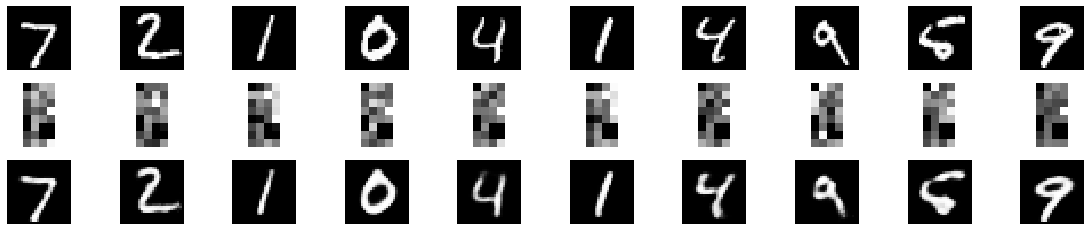

In [0]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded images
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encodeImage[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predictedImage[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
    
plt.show()